In [1]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
# AlexData = pd.read_csv('spambase.csv',index_col='Unnamed: 0')
AlexData = pd.read_csv('spambase.csv')

In [3]:
AlexData.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [4]:
AlexData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4595 non-null   float64
 4   word_freq_3d                4599 non-null   float64
 5   word_freq_our               4601 non-null   object 
 6   word_freq_over              4600 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4586 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

In [5]:
#Missing Values
AlexData.isnull().sum().sum()

341

In [6]:
#Summary Stats
AlexData.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4601.0,2300.000000,1328.338624,0.0,1150.000,2300.000,3450.000,4600.000
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4595.0,0.281023,0.504370,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4599.0,0.065453,1.395454,0.0,0.000,0.000,0.000,42.810
word_freq_over,4600.0,0.095922,0.273850,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4586.0,0.105639,0.401682,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


In [7]:
# Convert all values to numeric, invalid parsing will be set as NaN 
AlexData = AlexData.apply(pd.to_numeric, errors='coerce')

In [8]:
# Now fill missing values with the median of each column 
AlexData_cleaned = AlexData.fillna(AlexData.median())

C:\Users\Alex\AppData\Local\Temp\ipykernel_14072\1458665875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_spam', data=AlexData_cleaned, palette="viridis")


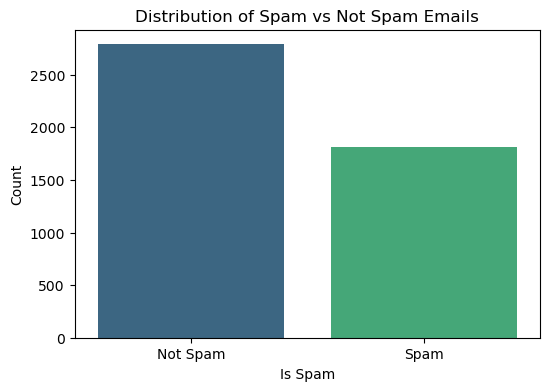

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_spam', data=AlexData_cleaned, palette="viridis") 
plt.title('Distribution of Spam vs Not Spam Emails')
plt.xlabel('Is Spam') 
plt.ylabel('Count') 
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.show()

In [15]:
# Summary statistics of a few key features
key_features = ['word_freq_make', 'word_freq_address', 'char_freq_!', 'capital_run_length_average']
AlexData_cleaned[key_features].describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
char_freq_!,4601.0,0.269071,0.815672,0.0,0.000,0.000,0.315,32.478
capital_run_length_average,4601.0,5.191515,31.729449,1.0,1.588,2.276,3.706,1102.500


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

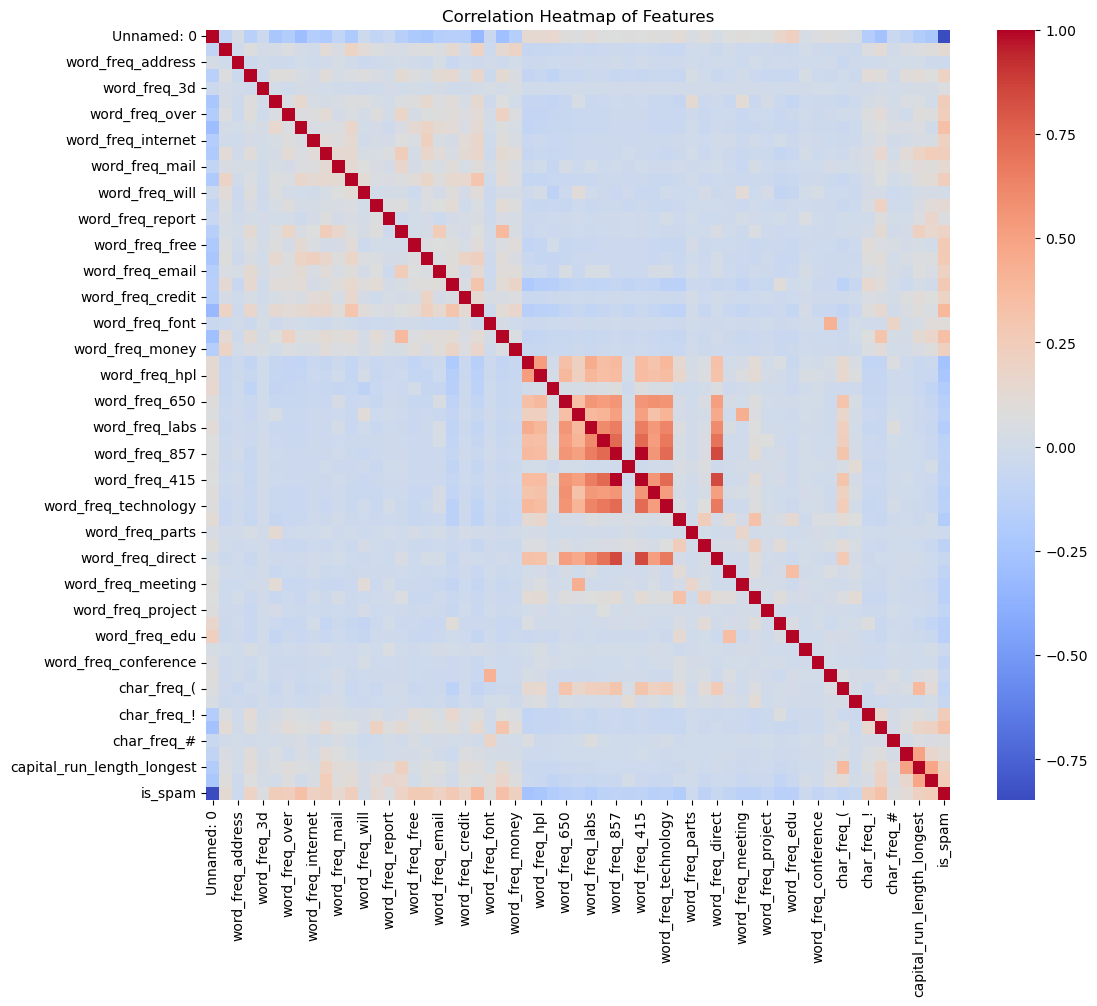

In [23]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = AlexData_cleaned.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True, annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

In [41]:
# Load the provided notebook to examine its contents and assess the code related to the requirements.
import nbformat

In [47]:
#Standardaising the data
features = AlexData_cleaned.drop(columns=["is_spam"])# Exclude the target variable

In [51]:
#Exclude the target variable
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [53]:
# PCA Determine components retaining 99.5% variance
pca = PCA()
pca.fit(features_scaled)

PCA()

In [59]:
#Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [63]:
#Find the number of complonents to retain 99.5% variance
n_components_99 = np.argmax(cumulative_variance >=0.995) + 1
print(f"Number of components to retain 99.5% variance: {n_components_99}")

Number of components to retain 99.5% variance: 56


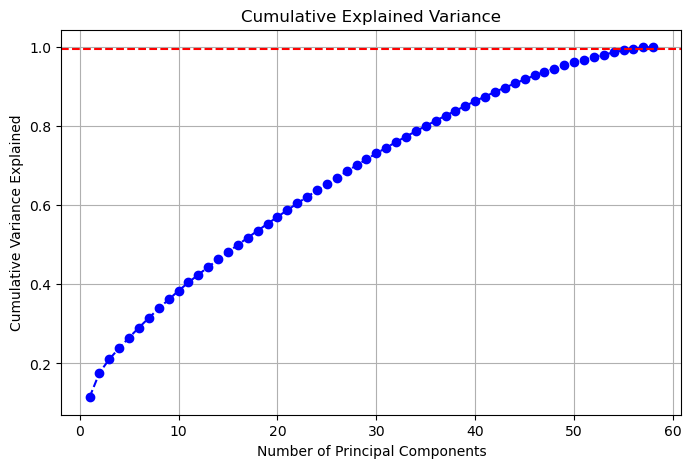

In [65]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.995, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()